## 뉴스기사 분류
### 다중 분류문제

In [2]:
## 로이터 데이터셋 로드
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # 자주등장하는 10000개 제한

2113536/2110848 [==============================] - 2s 1us/step


In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


### 로이터 데이터셋을 텍스트로 디코딩

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newsire = ' '.join([reverse_word_index.get( i - 3, '?') for i in train_data[0]])

### 데이터 인고딩하기

In [8]:
import numpy as np

In [11]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [29]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 모델 구성

In [30]:
from keras import layers, models

In [34]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
            metrics=['accuracy']
)

# 검증세트 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(x_val, y_val, epochs = 20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 1000 samples
Epoch 1/20
1000/1000 [==============================] - 0s 478us/step - loss: 3.8144 - acc: 0.1440 - val_loss: 3.5392 - val_acc: 0.4420
Epoch 2/20
1000/1000 [==============================] - 0s 148us/step - loss: 3.4405 - acc: 0.4260 - val_loss: 3.0207 - val_acc: 0.5220
Epoch 3/20
1000/1000 [==============================] - 0s 151us/step - loss: 2.9186 - acc: 0.4880 - val_loss: 2.4952 - val_acc: 0.6130
Epoch 4/20
1000/1000 [==============================] - 0s 150us/step - loss: 2.4078 - acc: 0.5850 - val_loss: 2.0496 - val_acc: 0.6660
Epoch 5/20
1000/1000 [==============================] - 0s 150us/step - loss: 1.9886 - acc: 0.6710 - val_loss: 1.7029 - val_acc: 0.7300
Epoch 6/20
1000/1000 [==============================] - 0s 148us/step - loss: 1.6615 - acc: 0.7320 - val_loss: 1.4421 - val_acc: 0.7690
Epoch 7/20
1000/1000 [==============================] - 0s 151us/step - loss: 1.4152 - a

### 훈련과 검증 손실 그리기

In [36]:
import matplotlib.pyplot as plt

findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans.


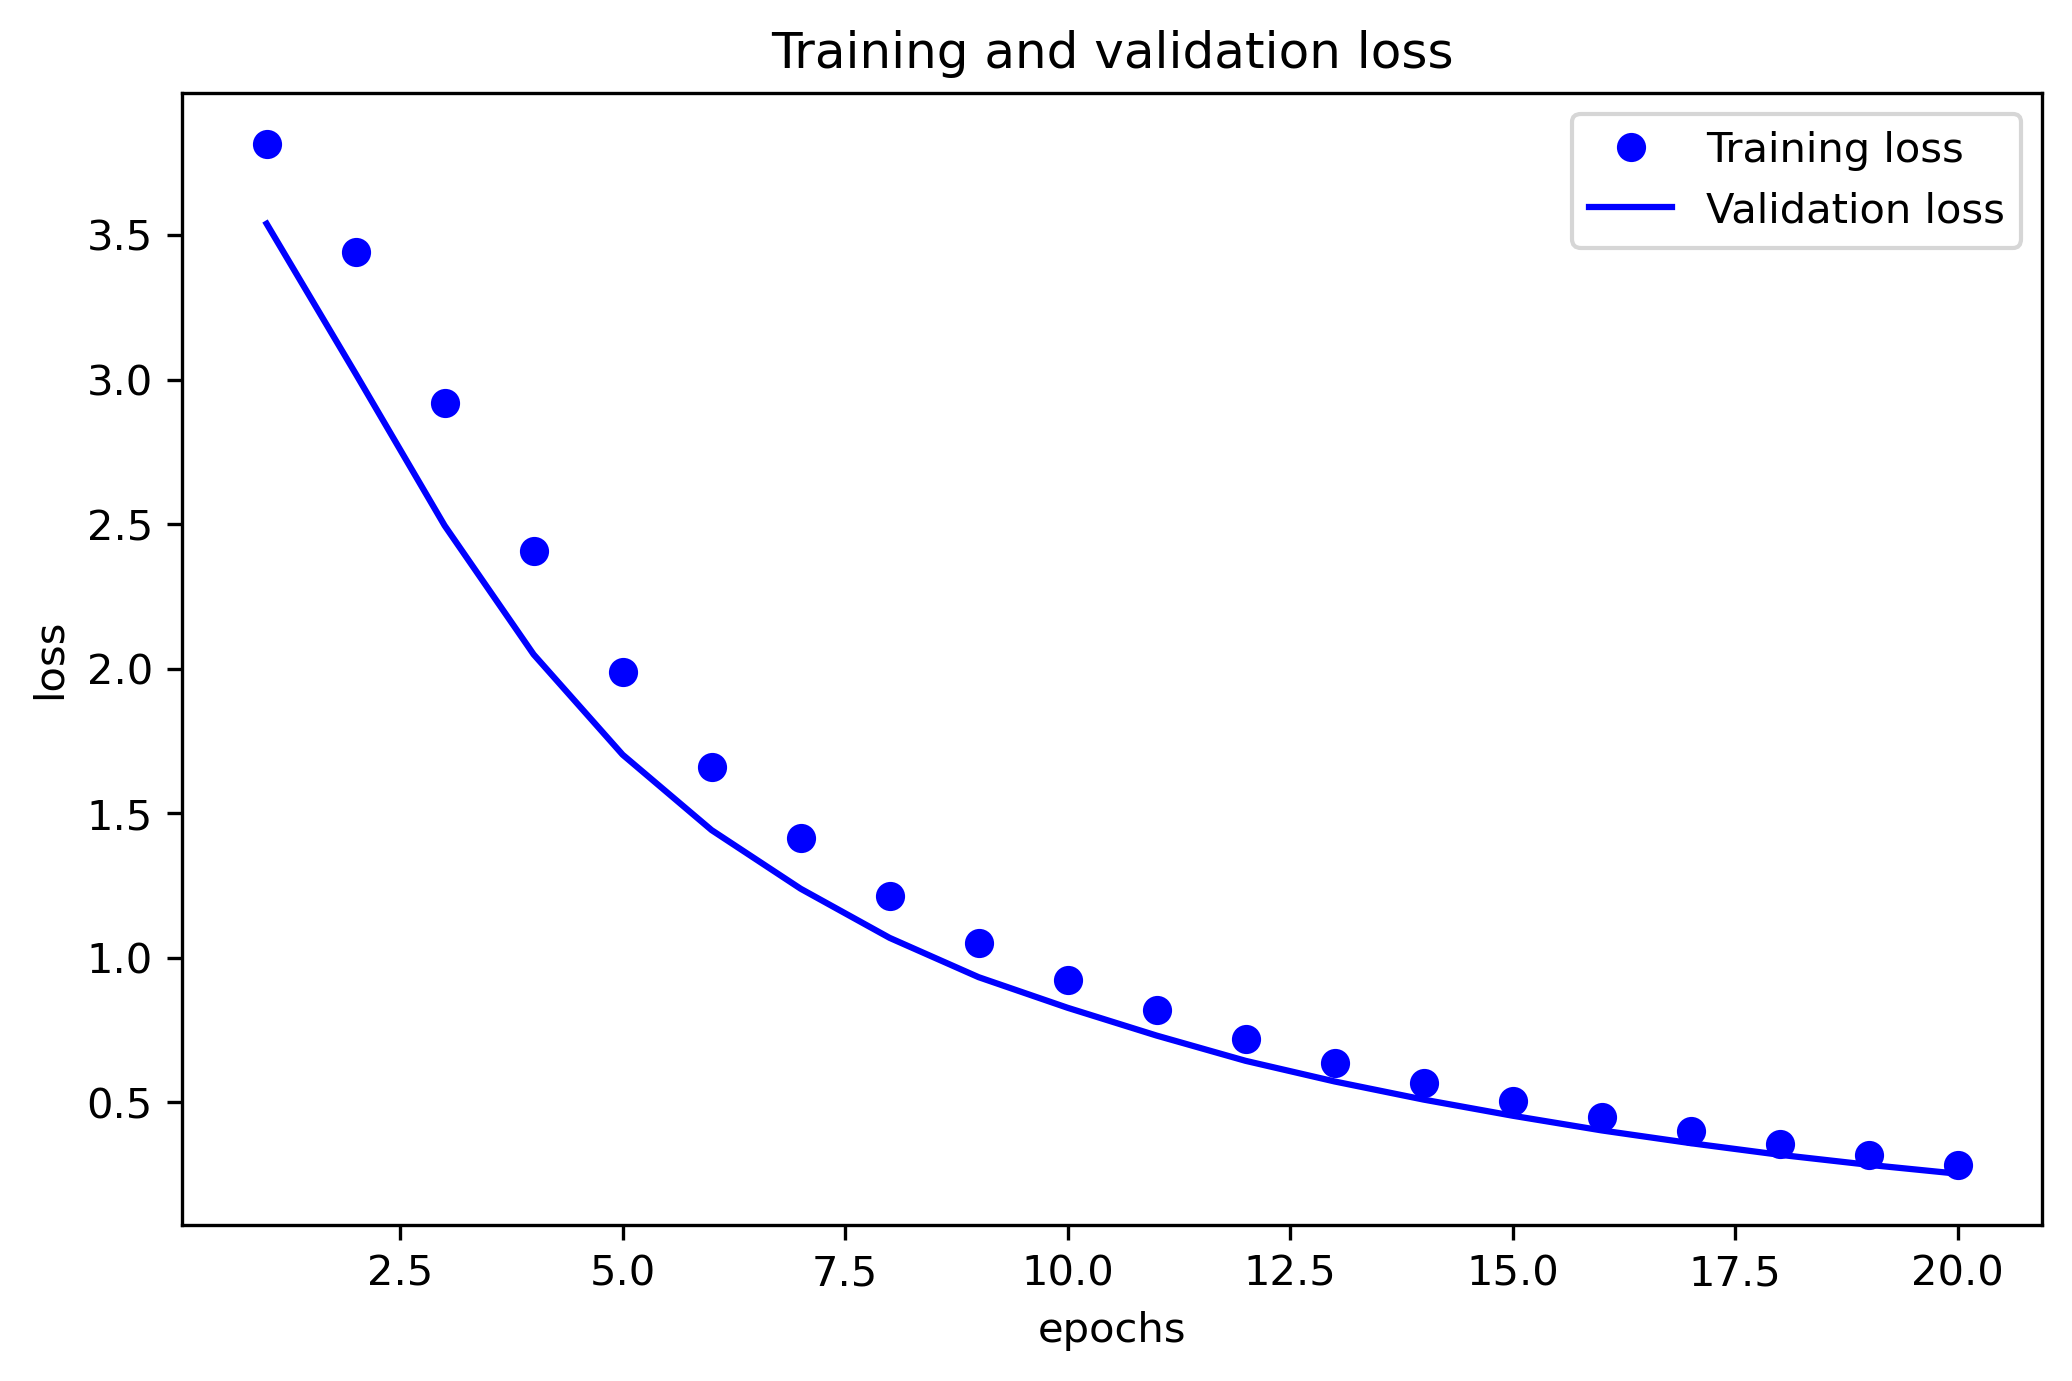

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

### 훈련과 검증 정확도 그리기

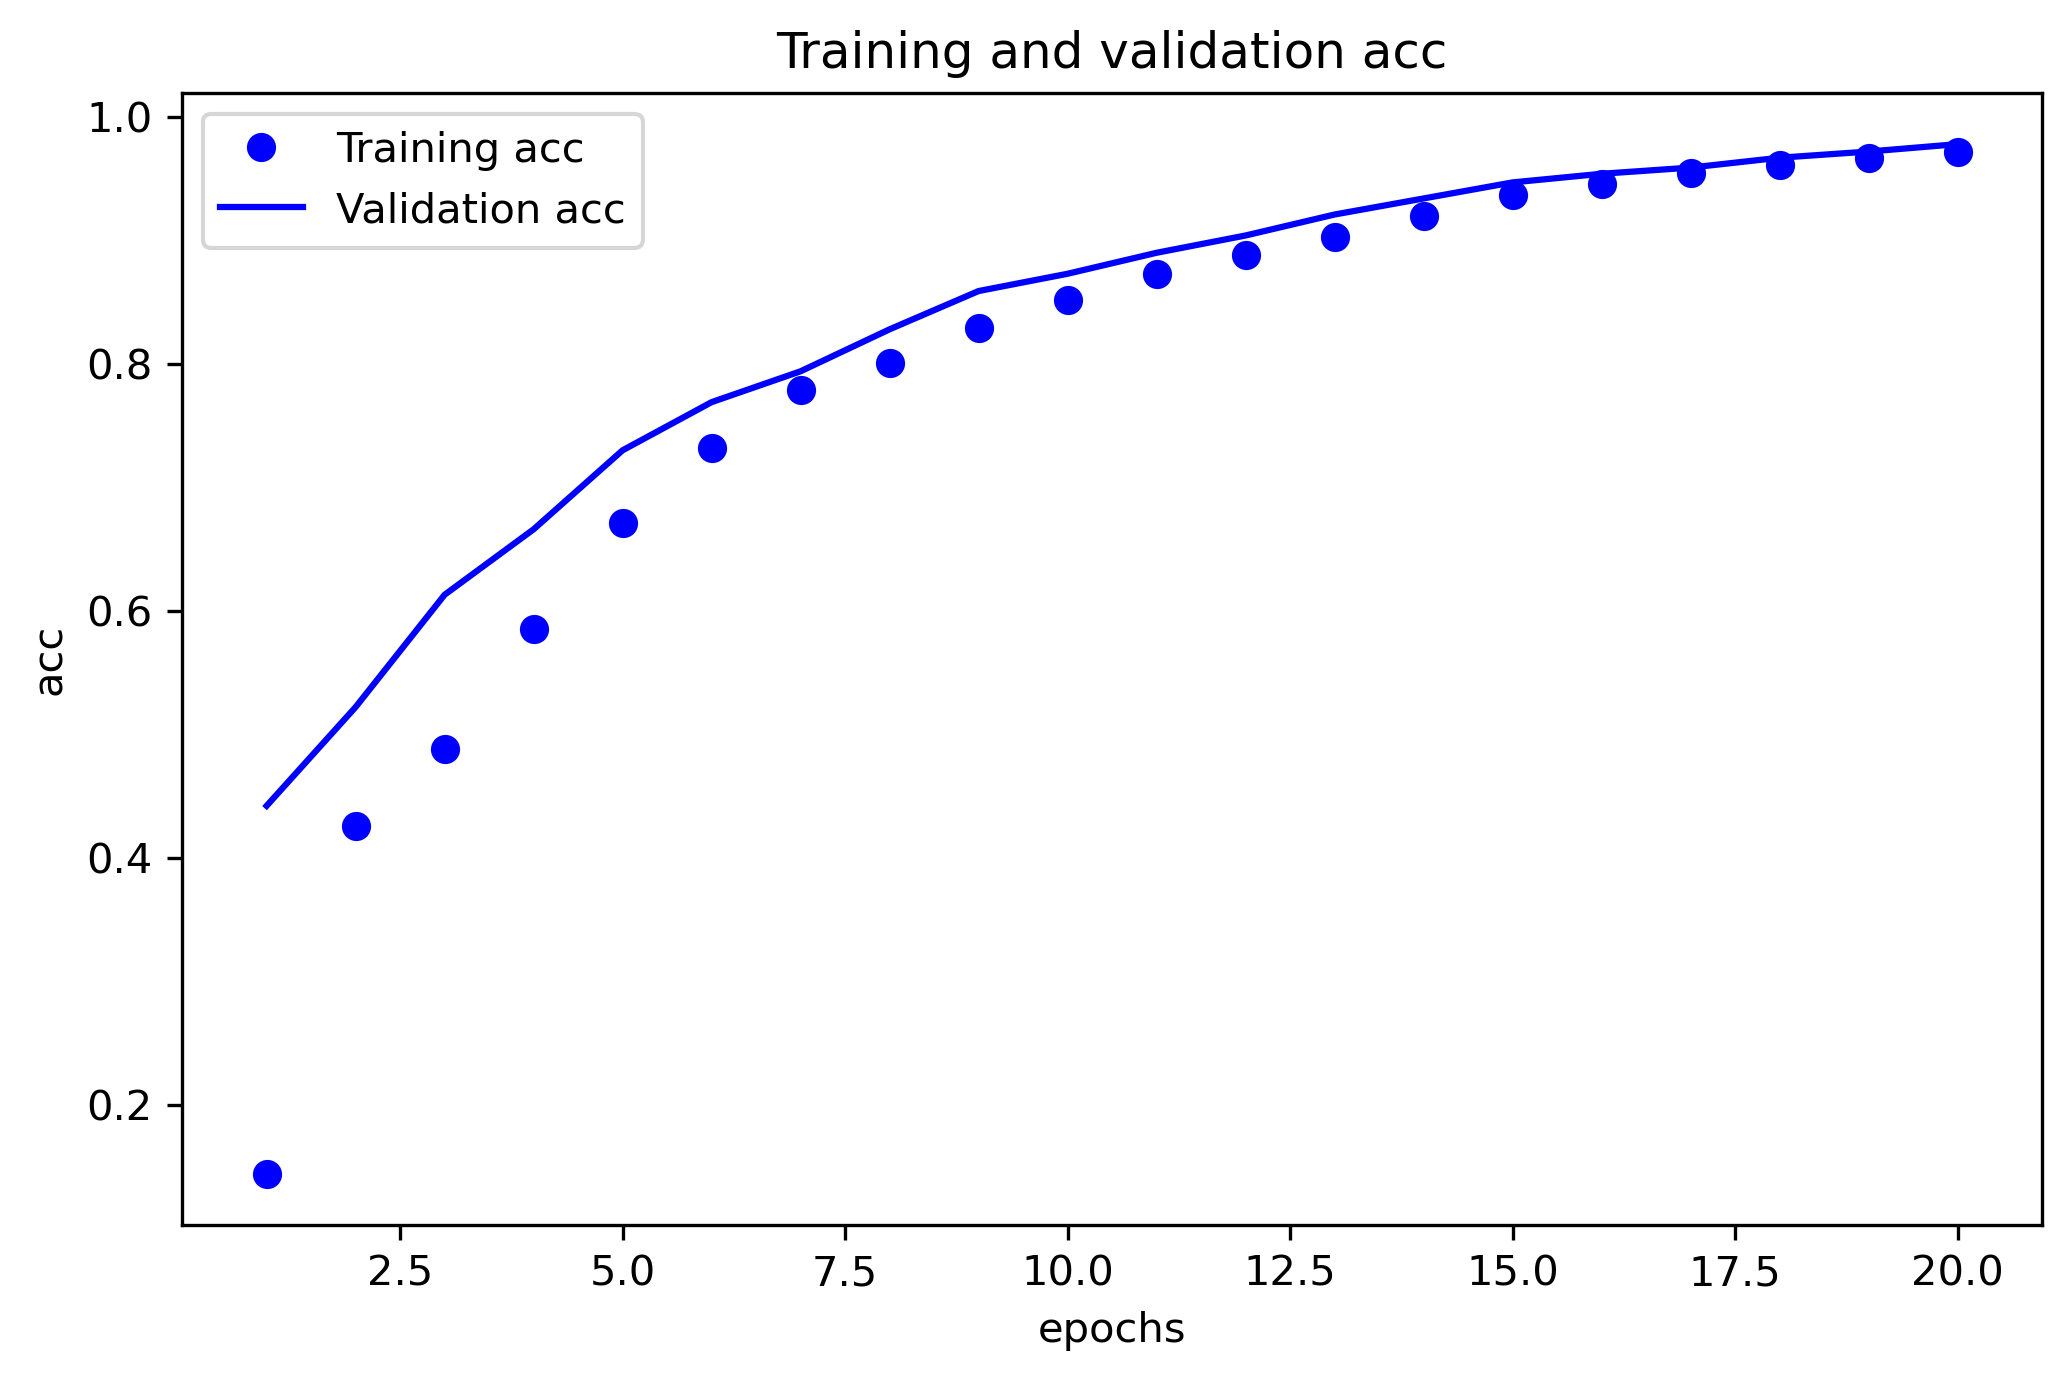

In [40]:
plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)

plt.title('Training and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.show()

### 모델을 처음부터 다시 훈련하기

In [41]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 134us/step - loss: 2.4762 - acc: 0.5541 - val_loss: 1.6445 - val_acc: 0.6660
Epoch 2/9
7982/7982 [==============================] - 1s 95us/step - loss: 1.3379 - acc: 0.7217 - val_loss: 1.2643 - val_acc: 0.7170
Epoch 3/9
7982/7982 [==============================] - 1s 94us/step - loss: 1.0006 - acc: 0.7856 - val_loss: 1.1238 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 94us/step - loss: 0.7862 - acc: 0.8315 - val_loss: 1.0150 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 1s 93us/step - loss: 0.6255 - acc: 0.8686 - val_loss: 0.9586 - val_acc: 0.8090
Epoch 6/9
7982/7982 [==============================] - 1s 94us/step - loss: 0.4931 - acc: 0.8971 - val_loss: 0.9086 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 1s 93us/step - loss: 0.3948 - acc: 0.9177 - val_loss: 0.9300 - val_acc: 0.8010
Epoch 8/9
798

In [43]:
results

[1.000912153604088, 0.7831700801955518]

In [44]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hist_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hist_array)/len(test_labels))

0.18477292965271594

### 새로운 데이터에 대해 예측하기

In [46]:
predictions = model.predict(x_test)

In [47]:
predictions[0].shape

(46,)

In [50]:
np.sum(predictions[0])

0.9999999

In [51]:
np.argmax(predictions[0])

3

## Summary
- 마지막 출력보다 중간층의 히든 유닛이 더 많아야 한다.
- 그렇지 않은 경우, 정보의 병목현상이 발생한다.
- N개의 클래스로 데이터포인트를 분류하려면, 마지막 층은 N개
- 단일 레이블, 다중 분류 문제에서는 softmax 사용
- 범주형 크로스엔트로피 사용, 모델이 출력한 확률분포와 타깃분포 거리를 최소화 함
- 범주형 인코딩(원핫 인코딩)으로 인코딩 하고, categorical_crossentropy 손실함수 사용
- 레이블을 정수로 인코딩하고 sparse_categoricla_crossentropy 함수 사용